## <font color=darkblue> HANDLING BIG DATAFILES

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display

In [2]:
import vnns

<font color=darkblue> In the earlier notebooks, our focus has been "medium" datasets with a limited number of samples, features, and classes. In this notebook, we will be working with significantly bigger datasets to further verify the robustness of our script. <br><br>
As explained in the Introduction, we have four big datasets: HandWrite, Cat, HappyHouse, and SignsFlattened. Their number of samples, features, and class labels can also be found in the Introduction. We will start by running gradient descent on all these datasets by setting polydeg = 1, hidden_units = 1, and lamda = 0 to see whether 'GD' would be able to handle them with respect to number of iterations and execution time for this most basic setup: 

In [3]:
scoreboard = pd.DataFrame()
for data in ['HandWrite','Cat','HappyHouse','SignsFlattened']:
    dla = vnns.DeepLearnAuto(datafile = "Data\\Big\\"+data+"_tr.csv", 
                             normalize = False,
                             polydeg = 1,
                             method = 'GD', 
                             initialize = 'deep',
                             learning_rate= 'auto', 
                             lamda = 0,
                             maxiter = 10000, 
                             hidden_units = [])
    scoreboard= scoreboard.append(dla.generate_summary(),ignore_index=True)
print ("\n\n*** Summary (method = 'GD', hidden_units = [], lamda = 0) ***")
display(scoreboard)



*** Summary (method = 'GD', hidden_units = [], lamda = 0) ***


,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,HandWrite,False,GD,8705,120.480762,1,[],0,0.957,0.898
1,Cat,False,GD,10000,94.66118,1,[],0,1.0,0.694
2,HappyHouse,False,GD,10000,222.118329,1,[],0,0.97,0.946
3,SignsFlattened,False,GD,10000,670.18231,1,[],0,0.875,0.798


<font color=darkblue> We observe that in three of the datasets maximum number of iterations were reached and in the last one the number of iterations it is very close to the limit. Execution times are also quite long accordingly. Now let's try 'TNC' for the same setting:

In [4]:
scoreboard = pd.DataFrame()
for data in ['HandWrite','Cat','HappyHouse','SignsFlattened']:
    dla = vnns.DeepLearnAuto(datafile = "Data\\Big\\"+data+"_tr.csv", 
                             normalize = False,
                             polydeg = 1,
                             method = 'TNC', 
                             initialize = 'deep',
                             learning_rate= 'auto', 
                             lamda = 0,
                             maxiter = 10000, 
                             hidden_units = [])
    scoreboard= scoreboard.append(dla.generate_summary(),ignore_index=True)
print ("\n\n*** Summary (method = 'TNC', hidden_units = [], lamda = 0) ***")
display(scoreboard)



*** Summary (method = 'TNC', hidden_units = [], lamda = 0) ***


,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,HandWrite,False,TNC,465,145.414719,1,[],0,1.0,0.832
1,Cat,False,TNC,15,1.304318,1,[],0,1.0,0.673
2,HappyHouse,False,TNC,26,4.465583,1,[],0,1.0,0.96
3,SignsFlattened,False,TNC,121,59.828542,1,[],0,1.0,0.882


<font color=darkblue> We now note that the number of iterations is very significantly reduced for all datasets while the accuracy is improved (except HandWrite test score.) Hence, for the rest of this notebook, we will drop 'GD' and focus on scipy's built-in algorithms. Let's first run again all data sets with 'TNC' by setting lamda = 'auto' and turning on plotting and reporting flags:



*** Datafile: HandWrite


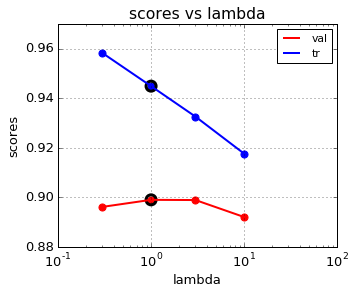

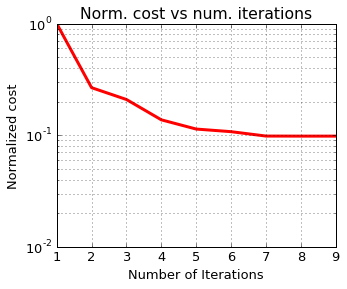


data:
	file: Data\Big\HandWrite_tr.csv
	m = 4000 training examples
	n = 400 features
	original classes: [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
	number of samples in class 0 = 397
	number of samples in class 1 = 410
	number of samples in class 2 = 407
	number of samples in class 3 = 397
	number of samples in class 4 = 408
	number of samples in class 5 = 406
	number of samples in class 6 = 396
	number of samples in class 7 = 393
	number of samples in class 8 = 393
	number of samples in class 9 = 393
solver:
	feature normalization: no
	polynomial regression: no
	neural network config: [400, 10]
	regularization: yes (lambda = 1.0)
	method: TNC
output:
	* Converged (|f_n-f_(n-1)| ~= 0)
	initial cost = 3.06665129125
	final cost = 0.300902906839
	number of iterations = 8
	accuracy on the training set: 0.939
	execution time:  1.671424  sec


*** Datafile: Cat


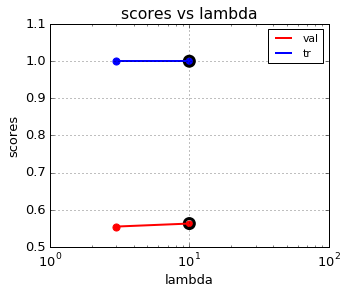

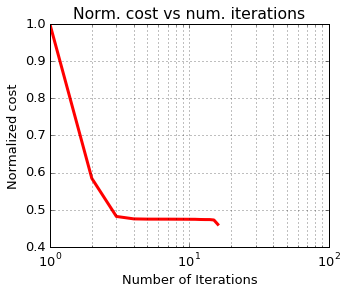


data:
	file: Data\Big\Cat_tr.csv
	m = 208 training examples
	n = 12288 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 136
	number of samples in class 1 = 72
solver:
	feature normalization: no
	polynomial regression: no
	neural network config: [12288, 1]
	regularization: yes (lambda = 10.0)
	method: TNC
output:
	* Linear search failed
	initial cost = 0.318692184605
	final cost = 0.146861318356
	number of iterations = 15
	accuracy on the training set: 1.0
	execution time:  4.082172  sec


*** Datafile: HappyHouse


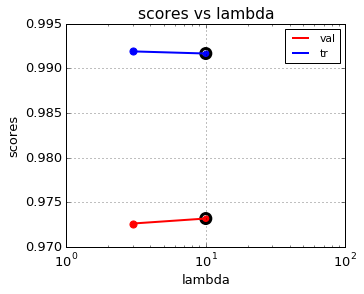

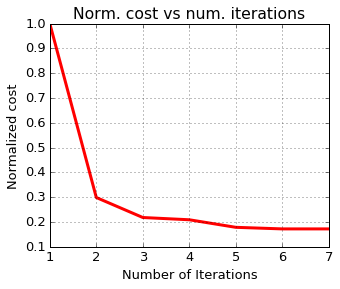


data:
	file: Data\Big\HappyHouse_tr.csv
	m = 599 training examples
	n = 12288 features
	original classes: [0.0, 1.0]
	number of samples in class 0 = 299
	number of samples in class 1 = 300
solver:
	feature normalization: no
	polynomial regression: no
	neural network config: [12288, 1]
	regularization: yes (lambda = 10.0)
	method: TNC
output:
	* Converged (|f_n-f_(n-1)| ~= 0)
	initial cost = 0.447054623749
	final cost = 0.0769664166478
	number of iterations = 6
	accuracy on the training set: 0.992
	execution time:  1.805686  sec


*** Datafile: SignsFlattened


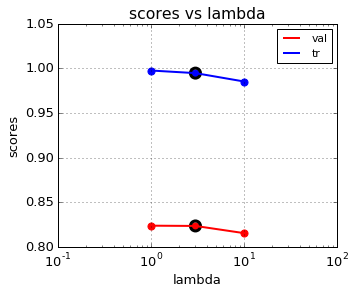

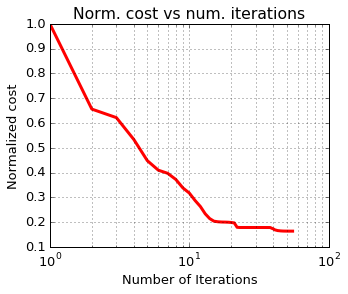


data:
	file: Data\Big\SignsFlattened_tr.csv
	m = 1079 training examples
	n = 12288 features
	original classes: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0]
	number of samples in class 0 = 180
	number of samples in class 1 = 180
	number of samples in class 2 = 180
	number of samples in class 3 = 180
	number of samples in class 4 = 180
	number of samples in class 5 = 179
solver:
	feature normalization: no
	polynomial regression: no
	neural network config: [12288, 6]
	regularization: yes (lambda = 3.0)
	method: TNC
output:
	* Converged (|f_n-f_(n-1)| ~= 0)
	initial cost = 1.82138921921
	final cost = 0.298325312468
	number of iterations = 54
	accuracy on the training set: 0.998
	execution time:  63.41949  sec


*** Summary (method = 'TNC', hidden_units = [], lamda = 'auto') ***


,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,HandWrite,False,TNC,8,1.671424,1,[],1.0,0.939,0.905
1,Cat,False,TNC,15,4.082172,1,[],10.0,1.0,0.694
2,HappyHouse,False,TNC,6,1.805686,1,[],10.0,0.992,0.946
3,SignsFlattened,False,TNC,54,63.41949,1,[],3.0,0.998,0.899


In [5]:
scoreboard = pd.DataFrame()
for data in ['HandWrite','Cat','HappyHouse','SignsFlattened']:
    print("\n\n*** Datafile:", data)
    dla = vnns.DeepLearnAuto(datafile = "Data\\Big\\"+data+"_tr.csv", 
                             normalize = False, 
                             method = 'TNC', 
                             polydeg = 1,
                             initialize = 'deep',
                             lamda = 'auto',
                             maxiter = 10000, 
                             hidden_units = [],
                             plot_J = True, 
                             report_summary = True,  
                             plot_lam = True)
    summary = dla.generate_summary()
    scoreboard= scoreboard.append(summary,ignore_index=True)
print ("\n\n*** Summary (method = 'TNC', hidden_units = [], lamda = 'auto') ***")
display(scoreboard)

<font color=darkblue> We observe that the auto-calculated lamda values are on the high side. Consequently training scores tend to degrade and test scores tend to improve slightly with regularization. Except the test score on the dataset Cat, scores are high and meet our arbitrary criterion of tr_score + test_score >= 1.8. <br><br>
To further improve the test score on Cat (note already the slight increase for lamda=10 compared to lamda=0), we will normalize the features and try also three hidden layers with with five and ten units in each layer. Lamda will remain the same as in the last run (equal to 10):

In [6]:
scoreboard = pd.DataFrame()
for hu in [[],[5,5,5],[10,10,10]]:
    dla = vnns.DeepLearnAuto(datafile = "Data\\Big\\Cat_tr.csv", 
                             normalize = True,                             
                             polydeg = 1,
                             method = 'TNC',
                             initialize = 'deep',
                             lamda = 10,
                             maxiter = 10000, 
                             hidden_units = hu)
    summary = dla.generate_summary()
    scoreboard= scoreboard.append(summary,ignore_index=True)
print ("\n\n*** Summary (method = 'TNC', lamda = 10, normalize = True) ***")
display(scoreboard)



*** Summary (method = 'TNC', lamda = 10, normalize = True) ***


,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,Cat,True,TNC,8,1.697303,1,[],10,1.0,0.714
1,Cat,True,TNC,78,26.4788,1,"[5, 5, 5]",10,0.995,0.776
2,Cat,True,TNC,35,20.165359,1,"[10, 10, 10]",10,1.0,0.816


<font color=darkblue> A steady improvement of the test score from raw to normalized data and from there to [5,5,5] and [10,10,10] hidden layer configurations is observed for nearly perfect training score. Also note that hidden_units = [10,10,10] combined with lamda = 10 allows now to meet our minimum combined score criterion.<br><br>
How about the other scipy methods? SLSQP and BFGS being too memory-hungry for this example, we will only use CG and L-BFGS-B for comparison with TNC:


*** Method: CG


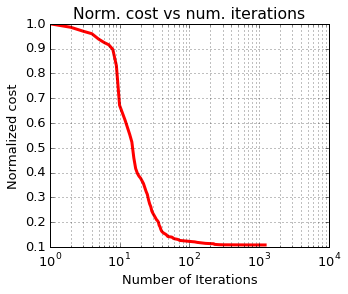


*** Method: L-BFGS-B


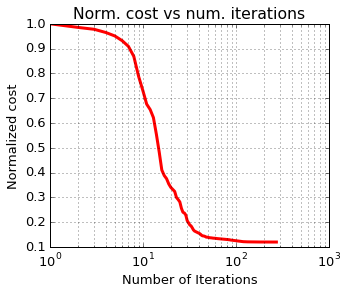



*** Summary (hidden_units = [10,10,10], lamda = 10, normalize = True) ***


,data,normalize,method,num iter,exec time,poly deg,hidden layers,lamda,tr score,test score
0,Cat,True,CG,1220,68.691787,1,"[10, 10, 10]",10,1.0,0.755
1,Cat,True,L-BFGS-B,272,14.408465,1,"[10, 10, 10]",10,0.99,0.755


In [7]:
scoreboard = pd.DataFrame()
for method in ['CG','L-BFGS-B']:
    print ("\n*** Method:", method)
    dla = vnns.DeepLearnAuto(datafile = "Data\\Big\\Cat_tr.csv", 
                             normalize = True,                             
                             polydeg = 1,
                             method = method,
                             initialize = 'deep',
                             lamda = 10,
                             maxiter = 10000, 
                             hidden_units = [10,10,10],
                             plot_J = True)
    summary = dla.generate_summary()
    scoreboard= scoreboard.append(summary,ignore_index=True)
print ("\n\n*** Summary (hidden_units = [10,10,10], lamda = 10, normalize = True) ***")
display(scoreboard)

<font color=darkblue> 'CG' and 'L-BFGS-B' remain much better than 'GD' in terms of number of iterations and accuracy, however they remain behind 'TNC' for this particular example and hyperparameter set. <br><br>
__The conclusion__ out of this notebook is that, for large datasets, our specific gradient descent implementation would be too slow, hence scipy's built-in methods would be preferable. __However,__ while using those scipy-based methods one should keep in mind the issues that we had mentioned in NB05, namely the dependency of the results on the specific machine the algorithm is run as well on the specific python/scipy versions.